In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Datasets/Raw_Dataset/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv')
df.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,16/02/2018 08:27:23,112640768,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,138.593,56300000,56300000,Benign
1,0,0,16/02/2018 08:30:12,112641773,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,263.751,56300000,56300000,Benign
2,35605,6,16/02/2018 08:26:55,20784143,23,44,2416,1344,240,64,...,20,2624734,0,2624734,2624734,9.05821e+06,0,9058214,9058214,Benign
3,0,0,16/02/2018 08:33:01,112640836,3,0,0,0,0,0,...,0,0,0,0,0,5.63e+07,82.0244,56300000,56300000,Benign
4,23,6,16/02/2018 08:27:59,20,1,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign


In [3]:
features = ['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

In [4]:
X = df[features]
X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [5]:
def targetify(s):
    if s == 'Benign':
        return 0
    else:
        return 1

In [6]:
df['Target']=df['Label'].apply(targetify)

In [7]:
y = df['Target']

In [8]:
X = X.fillna(0)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(838860, 76) (838860,)
(209715, 76) (209715,)


In [10]:
# sampling got different result. I'll use the raw data instead

# X_train2 = X_train.sample(frac=0.1, replace=True, random_state=1)
# y_train2 = y_train.sample(frac=0.1, replace=True, random_state=1)
# X_test2 = X_test.sample(frac=0.1, replace=True, random_state=1)
# y_test2 = y_test.sample(frac=0.1, replace=True, random_state=1)
# print (X_train2.shape, y_train2.shape)
# print( X_test2.shape, y_test2.shape)

In [11]:
# I'm not even normalizing the data

# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled_train = min_max_scaler.fit_transform(X_train.values)

In [12]:
forest = ExtraTreesClassifier(n_estimators=200, random_state=1)

In [13]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=200,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [14]:
importances = forest.feature_importances_

In [15]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [16]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 8 (0.173030)
2. feature 7 (0.094713)
3. feature 5 (0.091732)
4. feature 52 (0.055962)
5. feature 40 (0.054747)
6. feature 16 (0.044865)
7. feature 12 (0.042170)
8. feature 53 (0.028250)
9. feature 51 (0.028107)
10. feature 61 (0.027691)
11. feature 41 (0.026933)
12. feature 38 (0.025958)
13. feature 46 (0.021331)
14. feature 21 (0.021113)
15. feature 65 (0.020165)
16. feature 3 (0.018927)
17. feature 39 (0.018123)
18. feature 45 (0.017774)
19. feature 17 (0.017608)
20. feature 9 (0.017588)
21. feature 0 (0.016692)
22. feature 64 (0.016262)
23. feature 20 (0.015810)
24. feature 2 (0.012703)
25. feature 60 (0.012329)
26. feature 11 (0.011463)
27. feature 22 (0.010779)
28. feature 34 (0.008773)
29. feature 4 (0.005414)
30. feature 1 (0.005121)
31. feature 15 (0.005088)
32. feature 66 (0.004218)
33. feature 47 (0.004086)
34. feature 14 (0.003934)
35. feature 35 (0.003602)
36. feature 50 (0.003199)
37. feature 28 (0.002158)
38. feature 36 (0.001351)
39. feature 6

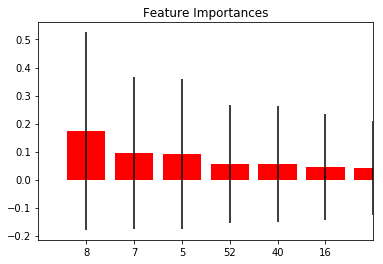

In [17]:
# Plot the top x feature importances of the forest
top_x = 6

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(top_x), indices)
plt.xlim([-1, top_x])
plt.show()